To begin we have the one dimensional time independent Schrodinger Equation

$$-\frac{\hbar^2}{2m}\frac{d\psi(x)^2}{dx^2} + V\psi(x) = E\psi(x)$$

We start by discretising space into $N$ number of points across a range of $X$ at which the equation is evaluated. The constants $\hbar$ and $m$ are set to 1 for simplicity.

In [1]:
import numpy as np 

N = 500 #number of points
X = np.linspace(-1, 1, N) #range X
hbar = 1 #hbar
m = 1 #mass

So we now have a simplified equation
$$-\frac{1}{2}\frac{d\psi(x)^2}{dx^2} + V\psi(x) = E\psi(x)$$
where $x$ is discretised.

Next the potential energy function is defined, it takes a value of $x$ and calculates the potential at this point and returns it.

In [2]:
def potential(x): 
    return (x**2)/100 #harmonic potential

We then construct a second order differentiation matrix which takes the form

$$
\begin{bmatrix}
2 & -1 & 0 & \ldots & 0 \\
-1 & 2 & -1 & \ldots & 0 \\
0 & -1 & 2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \ldots & 0 & -1 & 2 \\
\end{bmatrix}
$$

and construct our Hamiltonian operator 

$$-\frac{1}{2} \begin{bmatrix}
2 & -1 & 0 & \ldots & 0 \\
-1 & 2 & -1 & \ldots & 0 \\
0 & -1 & 2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & \ldots & 0 & -1 & 2 \\
\end{bmatrix}\psi(x) + V\psi(x) = E\psi(x) $$

Finally we can solve for the eigenvalues $E$ and the eigenvectors $\psi(x)$.

In [3]:
diagonal = np.ones([N]) #array of 1s length N
diagonals = np.array([diagonal, -2*diagonal, diagonal]) #array of 1s, -2s, 1s, all length N

from scipy import sparse

D = sparse.spdiags(diagonals, [-1, 0, 1], N, N) #construct tridiagonal sparse matrix using above array

U = sparse.diags(potential(X)) #convert V into a sparse matrix
 
H = (-((hbar**2)/2*m) * D) + U #construct hamiltonian operator

from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(H, k = 2, which = 'SM') #calculate eigenvalues and eigenvectors

Having found the eigenvectors and eigenvalues for each posistion $X$, we can plot them.

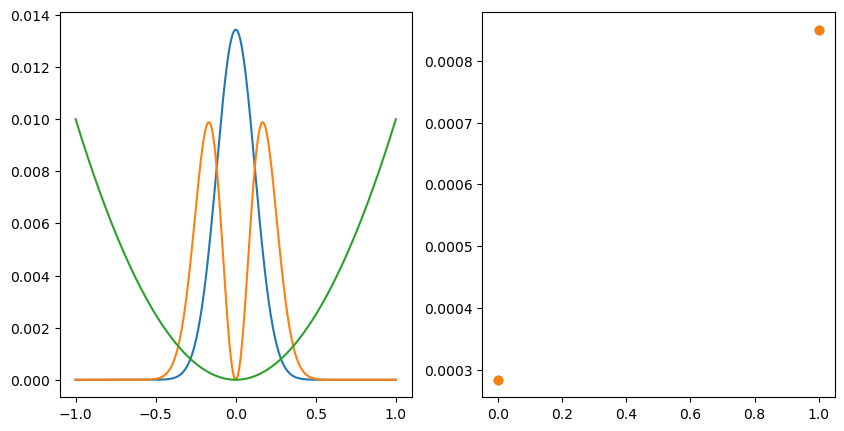

In [4]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize = (10, 5)) #initialise subplots

for i in range(len(eigenvectors[0])):
    ax[0].plot(X, eigenvectors[:,i]**2) #plot all calculated eigenvector probability densities 
      
ax[0].plot(X, potential(X)) #add potential to the plot

dummy = np.arange(0 , len(eigenvalues), 1) #dummy values for plotting eigenvalues

for i in range(len(eigenvalues)):
    ax[1].scatter(dummy, eigenvalues) #plot eigenvalues (energy)

Now we move onto the two dimensional time independent Schrodinger equation, which takes the form. 
$$-\frac{\hbar^2}{2m}\frac{d\psi(x)^2}{dx^2}\frac{d\psi(y)^2}{dy^2} + V\psi(x,y) = E\psi(x,y)$$
The method for solving here is much the same, but with some key differences. We again start by discretising space and setting our constants. For this case we need two dimensions of space, so we utilise a meshgrid to achieve this.

In [5]:
import numpy as np 

N = 100 #number of points
X, Y  = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N)) #range X and Y
hbar = 1 #hbar
m = 1 #mass

We now have 
$$-\frac{1}{2}\frac{d\psi(x)^2}{dx^2}\frac{d\psi(y)^2}{dy^2} + V\psi(x,y) = E\psi(x,y)$$
and again the potential is defined but takes $x$ and $y$ this time.

In [6]:
def potential(x, y): 
    return x*0*y*0 #infinite square well

We again construct the second order differentiation matrix, however this time we have two. So we must find a way to combine the two. This is done through use of a Kronecker sum. So we have

$$-1/2(D \otimes D)\psi(x,y) + V\psi(x,y) = E\psi(x,y)$$

For the equation. Hence, the Hamiltonian is constructed using the Kronecker product of $D$ and the two dimensional potential function, and the eigenvalues and eigenvectors are solved for. Note that since we have V in two dimensions with length $N$, but we need it as a vector, it will be reshaped into a single column vector of length $N^2$.

In [7]:
diagonal = np.ones([N]) #array of 1s length N
diagonals = np.array([diagonal, -2*diagonal, diagonal]) #array of 1s, -2s, 1s, all length N

from scipy import sparse

D = sparse.spdiags(diagonals, [-1, 0, 1], N, N) #construct tridiagonal sparse matrix using above array

U = sparse.diags(potential(X, Y).reshape(N**2)) #convert V into a sparse matrix and reshape

H = (-((hbar**2)/2*m) * sparse.kronsum(D,D)) + U #construct hamiltonian operator

from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(H, k = 4, which = 'SM') #calculate eigenvalues and eigenvectors

Again having found the eigenvectors and eigenvalues for each posistion $X$ and $Y$, we can plot them. Since we have calculated the eigenvectors as a one dimensional vector, we must convert it back to a two dimensional grid to visualise it properly.

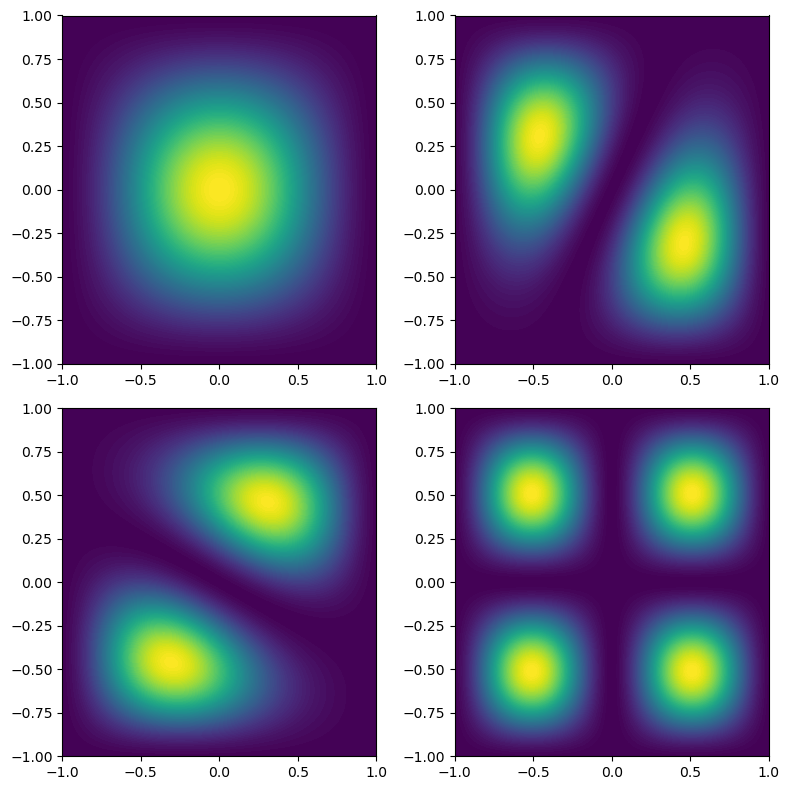

In [12]:
def reshape(i):
    return eigenvectors.T[i].reshape(N, N) #reshape eigenvectors to 2D

from matplotlib import pyplot as plt

subplots = len(eigenvectors[0]) #get number of subplots

fig, ax = plt.subplots(subplots//2, subplots//2, figsize=(8,8)) #initialise subplots

for i in range(len(eigenvectors[0])):
    row = i // 2
    col = i % 2
    ax[row, col].contourf(X, Y, reshape(i)**2, 100) #plot all calculated eigenvector probability densities 

plt.tight_layout()
plt.show()

The probability density of our eigenfunctions (wavefunctions) appear to be what is expected for the first four states in an infinite square well, now we will plot the eigenvalues (energies).

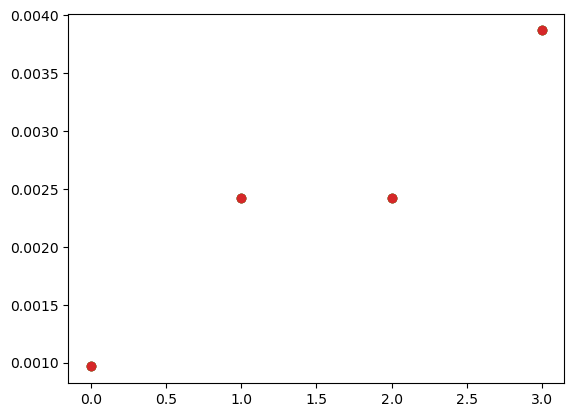

In [14]:
dummy = np.arange(0 , len(eigenvalues), 1)

for i in range(len(eigenvalues)):
    plt.scatter(dummy, eigenvalues) #plot eigenvalues (energy)

As expected for the two dimensional problem we can see that the second and third eigenvalues are degenerate.